In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
housing_prices_df_raw = pd.read_csv('../src/data/train.csv')

In [3]:
hdf = housing_prices_df_raw.copy()
hdf = hdf.drop(columns = 'Id')

# Feature Selection/Data Wragling

In [4]:
# Feature list
geo_feat = ['LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LandSlope', 
            'LotConfig']
location_feat = ['MSZoning', 'Street', 'Alley', 'Neighborhood', 'Condition1',
                'Condition2']
house_feat = ['MSSubClass', 'BldgType', 'HouseStyle',                                   #Types
              
              'OverallQual', 'OverallCond',                                             #Quality(general)
             
              'RoofStyle', 'RoofMatl',                                                  #Roof 
              
              'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',     #Material and cond
              
              'MasVnrType', 'MasVnrArea',                                               #Mansonry
              
              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtQual',     #Basement variables
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinType2', 'BsmtFullBath',
              'BsmtHalfBath',

              'Heating', 'HeatingQC', 'CentralAir',                                      #Heating/AC
               
              'Electrical', 'Utilities',                                                 #Energy
               
              '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',                       #Some house measures
               
               'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd',
               'Fireplaces',
               
               'KitchenQual', 'FireplaceQu',
               
               'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',  #Garage variables
               'GarageQual', 'GarageCond', 
               
               'Functional',
               'PavedDrive',
               'WoodDeckSF',
              
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',               #Porch

               'PoolArea', 'PoolQC',                                                     #Pool

               'Fence', 
              
               'MiscFeature', 'MiscVal']

time_feat = ['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd']             
sale_feat = ['SaleType', 'SaleCondition']

feat = geo_feat + location_feat + house_feat + time_feat + sale_feat

In [5]:
print(set(hdf.columns) - set(feat)) # 2 parameters are not described in the kaggle page. 

{'BedroomAbvGr', 'KitchenAbvGr', 'SalePrice'}


In [6]:
#LotShape?, BsmtExposure?
ord_feat  = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond',
             'BsmtFullBath','BsmtHalfBath', 
             
             'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', #Is it?
#              'Bedroom', 'Kitchen', #Not in dataframe??
             
             'KitchenQual', 'FireplaceQu', 'GarageCars', 'GarageQual', 'GarageCond',
             'Functional', 'PoolQC', 'BsmtQual'
             ]


cat_feat  = ['LotShape', 'LandContour', 'LotConfig', 'MSZoning', 'Street', 
             'Alley', 'Neighborhood', 'Condition1', 'Condition2', 'MSSubClass', 
             'BldgType', 'HouseStyle', 'LandSlope', 'Exterior1st', 'Exterior2nd',
             'Foundation', 'MasVnrType', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
             'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Utilities',
             'GarageType', 'GarageFinish', 'PavedDrive', 'Fence','MiscFeature',
             'SaleType', 'SaleCondition', 'RoofStyle', 'RoofMatl'
            ]


cont_feat = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
             'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
             'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
             'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
             
             'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd' #?
            ]


# Removing some outliers

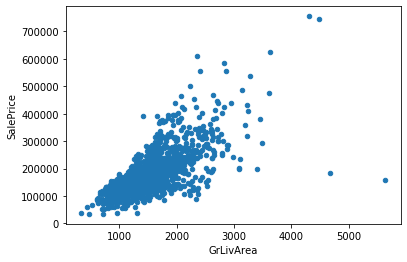

In [7]:
hdf.plot(kind = 'scatter', x = 'GrLivArea', y = 'SalePrice')
hdf = hdf[hdf['GrLivArea'] < 4000]

The plot justifies the removal of hourses with 'GrLivArea' > 4000 (high leverage).

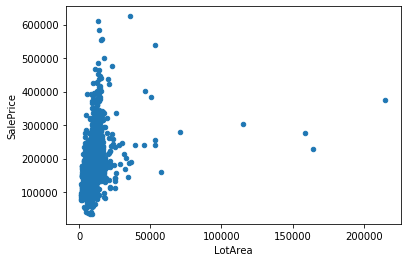

In [8]:
hdf.plot(kind = 'scatter', x = 'LotArea', y = 'SalePrice')
hdf = hdf.loc[hdf['LotArea'] < 100000,:]

The plot justifies the removal of hourses with 'LotArea' > 100000 (high leverage).

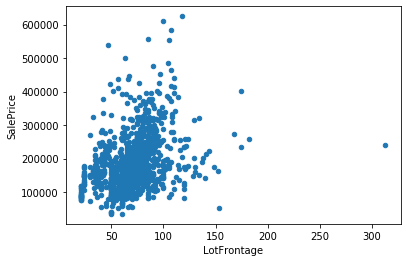

In [9]:
hdf.plot(kind = 'scatter', x = 'LotFrontage', y = 'SalePrice')
hdf = hdf.loc[hdf['LotFrontage'] < 250, ]

## Finding NA's

In [10]:
hdf.loc[:,hdf.isnull().sum() > 0]
hdf.isnull().sum()[hdf.isnull().sum() > 0]

Alley           1109
MasVnrType         6
MasVnrArea         6
BsmtQual          31
BsmtCond          31
BsmtExposure      32
BsmtFinType1      31
BsmtFinType2      32
Electrical         1
FireplaceQu      600
GarageType        74
GarageYrBlt       74
GarageFinish      74
GarageQual        74
GarageCond        74
PoolQC          1191
Fence            968
MiscFeature     1156
dtype: int64

In [11]:
# In percentage
round(100*hdf.isnull().sum()[hdf.isnull().sum() > 0]/len(hdf), 2)

Alley           92.80
MasVnrType       0.50
MasVnrArea       0.50
BsmtQual         2.59
BsmtCond         2.59
BsmtExposure     2.68
BsmtFinType1     2.59
BsmtFinType2     2.68
Electrical       0.08
FireplaceQu     50.21
GarageType       6.19
GarageYrBlt      6.19
GarageFinish     6.19
GarageQual       6.19
GarageCond       6.19
PoolQC          99.67
Fence           81.00
MiscFeature     96.74
dtype: float64

In [12]:
hdf.loc[hdf['Fence'].isnull(),'Fence'] = 'NoFen'
hdf.loc[hdf['PoolQC'].isnull(), 'PoolQC'] = 'NoPool'
hdf.loc[hdf['FireplaceQu'].isnull(), 'FireplaceQu'] = 'NoFir'
hdf.loc[hdf['Alley'].isnull(), 'Alley'] = 'NoAcc'

for gar in ['GarageFinish', 'GarageQual', 'GarageCond', 'GarageType']:
    hdf.loc[hdf[gar].isnull(), gar] = 'NoGar'

# There should be a better way to do this
hdf.loc[hdf['GarageYrBlt'].isnull(), 'GarageYrBlt'] = round(np.mean(hdf['GarageYrBlt'])) 


for bsmt in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    hdf.loc[hdf[bsmt].isnull(), bsmt] = 'NoBsmt'

hdf = hdf.drop(columns = 'MiscFeature') # drop feature (since price of feature in miscval)
cat_feat.remove('MiscFeature')
house_feat.remove('MiscFeature')
feat.remove('MiscFeature')

In [13]:
round(100*hdf.isnull().sum()[hdf.isnull().sum() > 0]/len(hdf), 2)

MasVnrType    0.50
MasVnrArea    0.50
Electrical    0.08
dtype: float64

We should input LotFrontage based on Lot area (a simple linear regression should be good). For now, I will just drop the column. The other nas I will remove the observation.

In [14]:
hdf = hdf.drop(columns = 'LotFrontage')
hdf = hdf.drop(labels = hdf.loc[hdf['MasVnrType'].isnull(),:].index)
hdf = hdf.drop(labels = hdf.loc[hdf['Electrical'].isnull(),:].index)

In [15]:
round(100*hdf.isnull().sum()[hdf.isnull().sum() > 0]/len(hdf), 2)

Series([], dtype: float64)

# Initialize

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import VarianceThreshold

from scipy import stats

In [17]:
X = hdf.loc[:,'MSSubClass':'SaleCondition']
X = pd.get_dummies(X, columns = cat_feat+ord_feat, drop_first=True)
y = hdf.loc[:, 'SalePrice']

In [18]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y)

### We fit a simple linear model for 'GrLivArea' with Sale price in log

(array([ 87., 461., 337., 162.,  78.,  34.,  19.,   4.,   3.,   3.]),
 array([ 34900.,  93910., 152920., 211930., 270940., 329950., 388960.,
        447970., 506980., 565990., 625000.]),
 <a list of 10 Patch objects>)

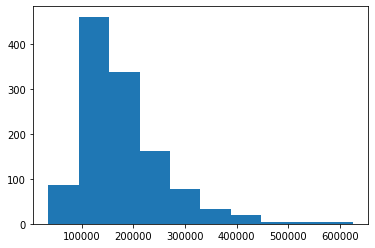

In [19]:
plt.hist(y)

(array([  5.,   9.,  31., 127., 343., 319., 197., 110.,  38.,   9.]),
 array([10.46024211, 10.74876859, 11.03729507, 11.32582155, 11.61434804,
        11.90287452, 12.191401  , 12.47992748, 12.76845396, 13.05698045,
        13.34550693]),
 <a list of 10 Patch objects>)

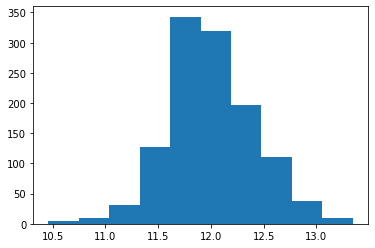

In [20]:
plt.hist(np.log(y))

In [21]:
slm_LivArea_log = LinearRegression()
slm_LivArea_log.fit(X_train[['GrLivArea']], np.log(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

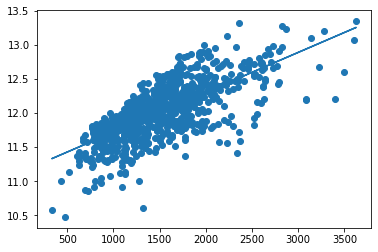

In [22]:
plt.scatter(X_train[['GrLivArea']], np.log(y_train))
plt.plot(X_train[['GrLivArea']], slm_LivArea_log.predict(X_train[['GrLivArea']]))

In [23]:
slm_LivArea_log.score(X_test[['GrLivArea']], np.log(y_test))

0.5162229277955444

# Drop columns with low variance

In [24]:
vr = []
for col in X.columns:
    vr.append((np.var(X[col]), col))

In [25]:
X_LV = X.copy()
X_LV = X_LV.drop(columns = list(map(lambda x: x[1], filter(lambda x: x[0] > .8*(1-.8), vr))))

In [26]:
# Normalization
for col in X_LV.columns:
    X_LV[col] = (X_LV[col] - np.mean(X_LV[col]))/np.std(X_LV[col], ddof=1)

# Lasso feature selection

In [27]:
from sklearn.linear_model import Lasso

In [28]:
# Normalization of the columns

for col in X.columns:
    X[col] = (X[col] - np.mean(X[col]))/np.std(X[col], ddof=1)

In [29]:
lasso_lm = Lasso(max_iter=1e7, warm_start=True)

In [30]:
lasso_coefs = []
alphas      = np.logspace(-1, 5, 1000)

In [31]:
for alpha in alphas:
    lasso_lm.set_params(alpha = alpha).fit(X_LV, y)
    lasso_coefs.append(lasso_lm.coef_)

KeyboardInterrupt: 

In [ ]:
df_coef = pd.DataFrame(lasso_coefs, index=alphas, columns = X_LV.columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title, legend = False)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

In [ ]:
df_coef.iloc[:, np.random.choice(range(df_coef.shape[1]), size = 5, replace = False)].plot(logx=True, title=title)

In [ ]:
df_coef

# Ridge Feature Selection


In [32]:
from sklearn.linear_model import Ridge

In [44]:
ridge_lm = Ridge(max_iter = 1e7)

In [48]:
ridge_coefs = []
ridge_alphas = np.logspace(-1, 7, 1000)

In [49]:
for alpha in ridge_alphas:
    ridge_lm.set_params(alpha = alpha).fit(X_LV, y)
    ridge_coefs.append(ridge_lm.coef_)

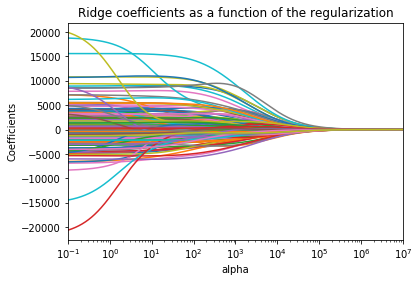

In [50]:
ridge_df_coef = pd.DataFrame(ridge_coefs, index=ridge_alphas, columns = X_LV.columns)
title = 'Ridge coefficients as a function of the regularization'
ridge_df_coef.plot(logx=True, title=title, legend = False)
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.show()

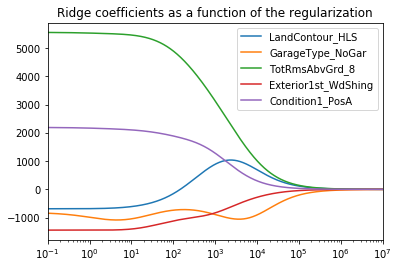

In [52]:
ridge_df_coef.iloc[:, np.random.choice(range(ridge_df_coef.shape[1]), size = 5, replace = False)].plot(logx=True, title=title)

In [53]:
ridge_df_coef

,KitchenAbvGr,LotShape_IR2,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,MSZoning_FV,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,BsmtQual_Fa,BsmtQual_NoBsmt
1.000000e-01,-4823.449701,-42.260526,2267.042323,-685.511125,-1490.473420,1839.663239,5081.883467,-260.728495,-285.745588,2326.498076,...,-2183.490898,-678.378125,-412.233673,1356.168709,297.409292,-3027.604617,-995.911154,-4058.889799,-136.754330,-1261.437070
1.018610e-01,-4823.370686,-41.946156,2267.043103,-685.507849,-1490.694947,1839.655937,5081.788165,-260.767902,-285.731909,2326.549024,...,-2183.441633,-678.392834,-412.161403,1356.220740,297.472736,-3027.505307,-995.789994,-4058.600068,-136.775579,-1261.375969
1.037567e-01,-4823.290219,-41.626603,2267.043870,-685.504479,-1490.920132,1839.648480,5081.691317,-260.808020,-285.718004,2326.600894,...,-2183.391582,-678.407832,-412.088004,1356.273644,297.537166,-3027.404270,-995.666803,-4058.305467,-136.797176,-1261.313750
1.056876e-01,-4823.208272,-41.301792,2267.044623,-685.501012,-1491.149026,1839.640864,5081.592902,-260.848861,-285.703870,2326.653699,...,-2183.340736,-678.423124,-412.013462,1356.327435,297.602593,-3027.301477,-995.541549,-4058.005924,-136.819125,-1261.250392
1.076545e-01,-4823.124820,-40.971650,2267.045362,-685.497444,-1491.381684,1839.633085,5081.492900,-260.890438,-285.689505,2326.707458,...,-2183.289085,-678.438718,-411.937763,1356.382125,297.669029,-3027.196901,-995.414203,-4057.701365,-136.841432,-1261.185876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.288979e+06,-1.462937,1.375493,0.281296,1.359872,0.044579,-0.105446,2.133236,-0.018132,0.216657,1.104417,...,-0.776336,-0.765990,-0.788685,-0.104733,1.242303,0.189981,-0.030719,-0.222572,-1.358832,-1.555573
9.461848e+06,-1.436245,1.350381,0.276161,1.335048,0.043762,-0.103515,2.094287,-0.017798,0.212702,1.084262,...,-0.762164,-0.752009,-0.774292,-0.102832,1.219634,0.186512,-0.030159,-0.218505,-1.334033,-1.527196
9.637935e+06,-1.410039,1.325727,0.271120,1.310676,0.042960,-0.101619,2.056049,-0.017471,0.208819,1.064476,...,-0.748252,-0.738283,-0.760162,-0.100965,1.197379,0.183106,-0.029609,-0.214514,-1.309686,-1.499336
9.817298e+06,-1.384310,1.301523,0.266172,1.286749,0.042172,-0.099758,2.018509,-0.017149,0.205007,1.045050,...,-0.734593,-0.724808,-0.746289,-0.099132,1.175529,0.179762,-0.029069,-0.210595,-1.285783,-1.471983
